# Week 1 handin

## 01 Assignment
### Exercise 1

1. Go to this website: https://www.komplett.dk/category/21640/gaming/spiludstyr/gaming-headset?nlevel=10431%C2%A721603%C2%A721640&sort=OrderedTimes_bf%3ADESCENDING&hits=192
2. Use BeautifulSoup, to select the name, price, amount of stars (review related) and amount in stock.
3. Save the data, to be used for later.

### Exercise 2

1. Using Regular Expressions and the data from exercise 1, find all headset which is in stock.
2. Create a list of tuples with the data from subtask 1.

### Exercise 3

1. Use the data from Exercise 2, to make a sorted bar chart of the headsets, where x-axis is names, and y-axis is price.

## 02 Status

## 03 Solution part 1

In [26]:
import bs4
import requests

r = requests.get('https://www.komplett.dk/category/21640/gaming/spiludstyr/gaming-headset?nlevel=10431%C2%A721603%C2%A721640&sort=OrderedTimes_bf%3ADESCENDING&hits=192')
r.raise_for_status()

soup = bs4.BeautifulSoup(r.text, 'html.parser')
names = soup.select('h2')
prices = soup.select('span[class="product-price-now"]')
stars = soup.select('div[class=review]')
stock = soup.select('span[class="stockstatus-stock-details"]')

name_list = []
price_list = []

for idx, val in enumerate(names):
    name_list.append(names[idx].getText())
    price_list.append(prices[idx].getText())

both = dict(zip(name_list, price_list))

IndexError: list index out of range

## 03 Solution part 2

In [44]:
import re

in_stock = re.compile(r'stk. på lager')
in_stock_all = in_stock.findall(str(stock))
print('Matches: {}'.format(in_stock_all))

Matches: ['stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk. på lager', 'stk

## 03 Solution part 3

<BarContainer object of 185 artists>

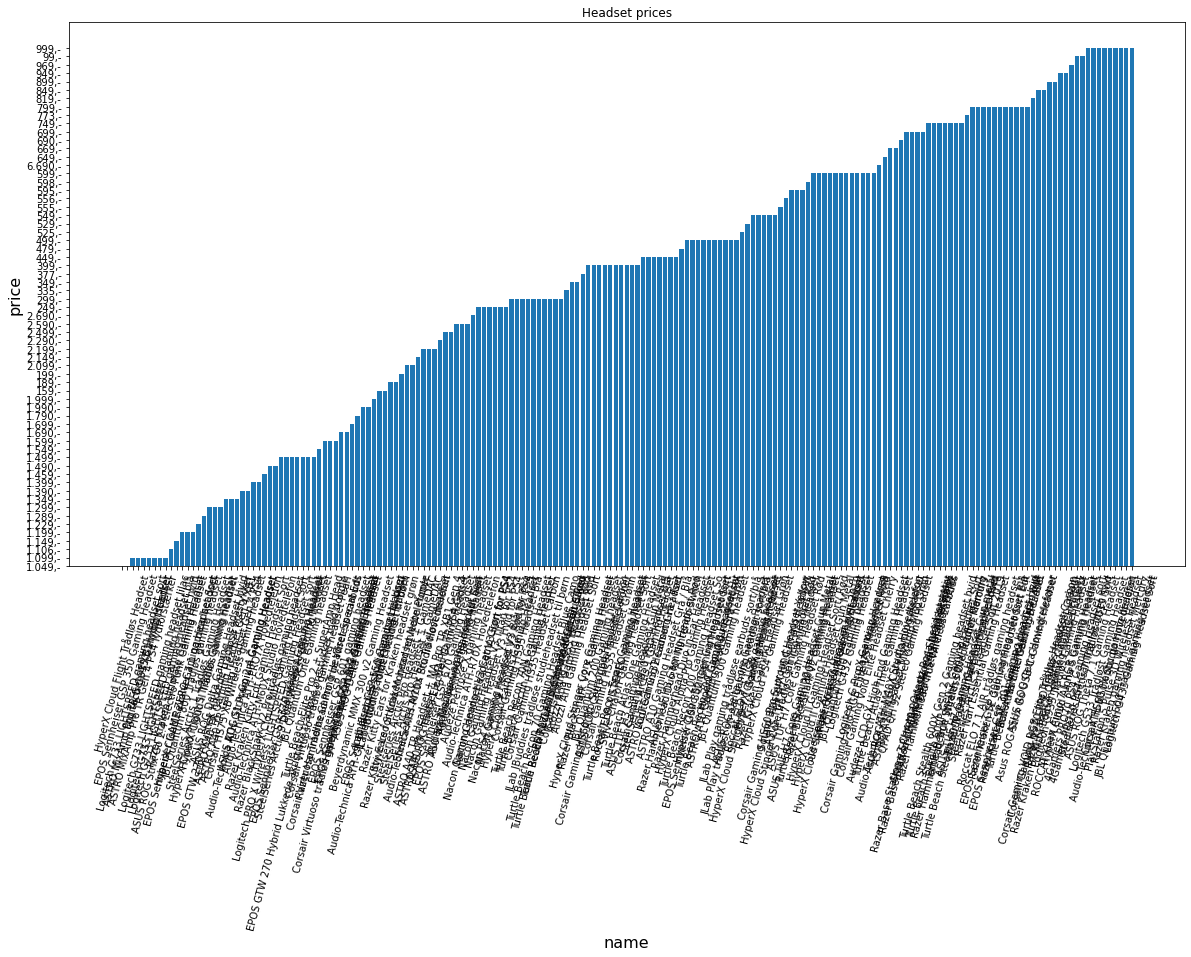

In [48]:
import matplotlib.pyplot as plt

sorted_dict = {k: v for k, v in sorted(both.items(), key=lambda item: item[1])}

x = list(sorted_dict.keys())
y = list(sorted_dict.values())
plt.figure(figsize=(20,10))
plt.xticks(rotation=75)
plt.title("Headset prices", fontsize=12)
plt.xlabel("name", fontsize=16)
plt.ylabel("price", fontsize=16)

plt.bar(x,y)